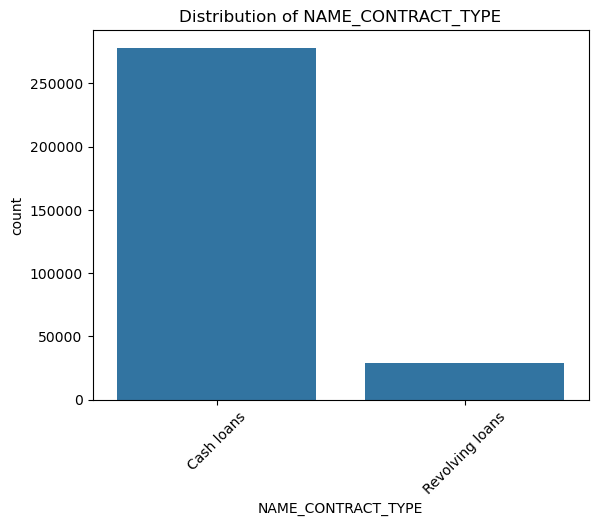

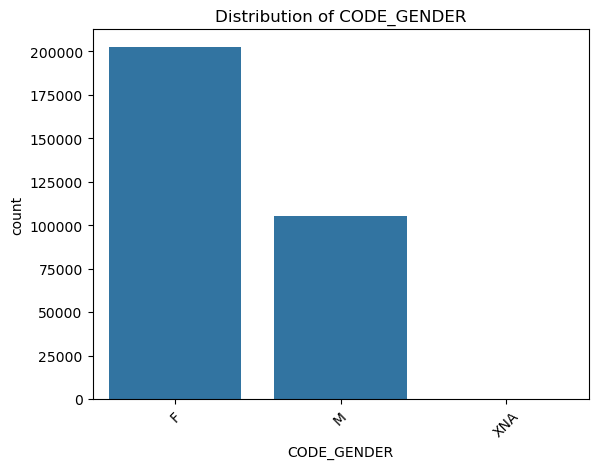

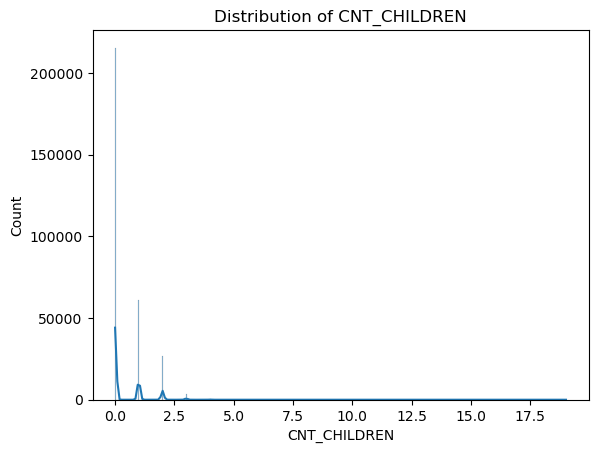

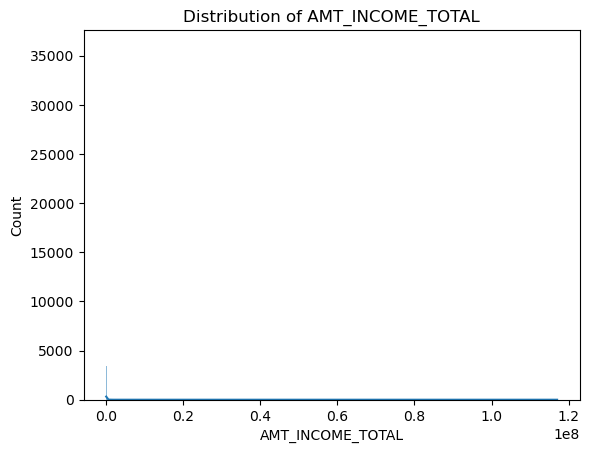

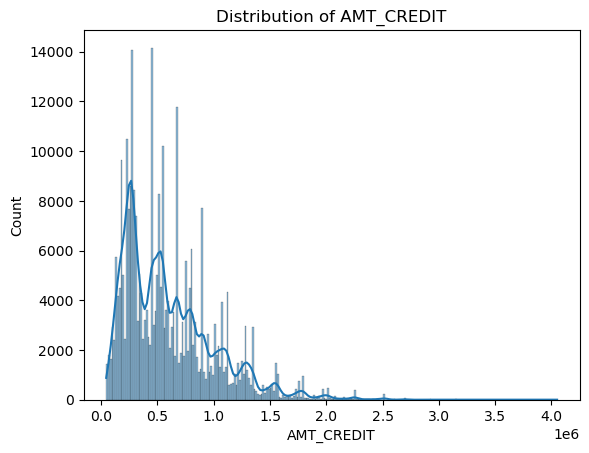

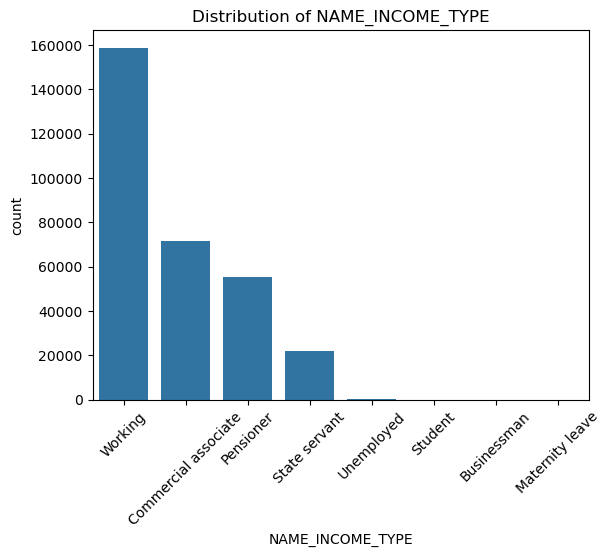

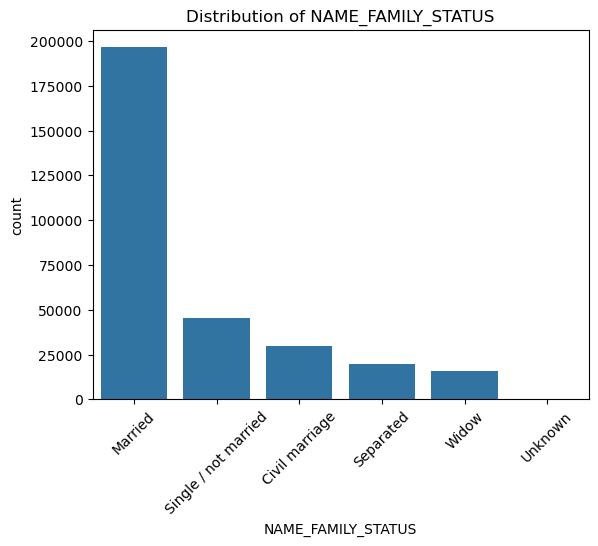

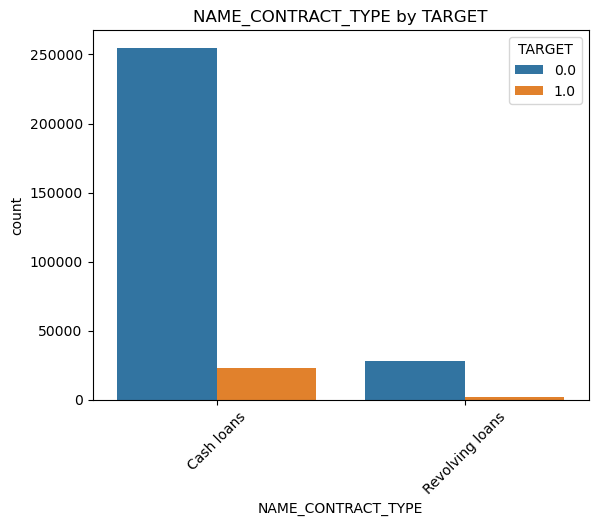

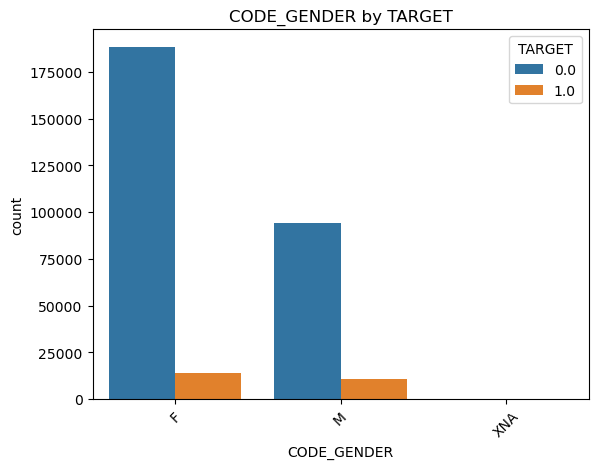

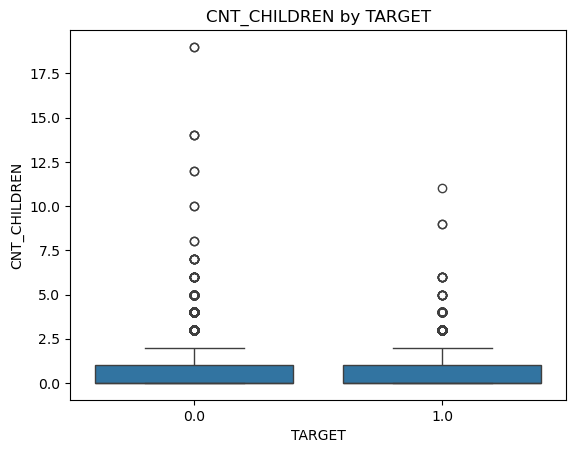

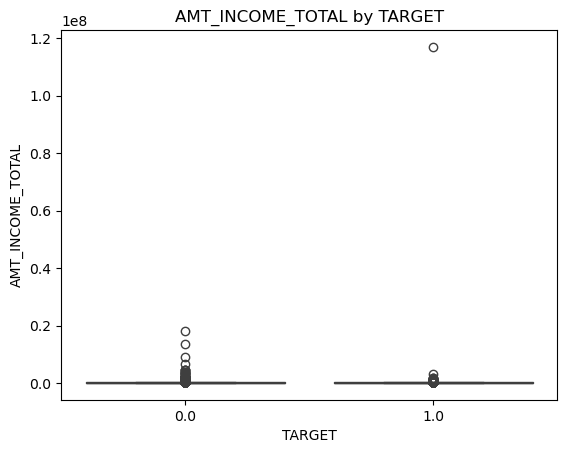

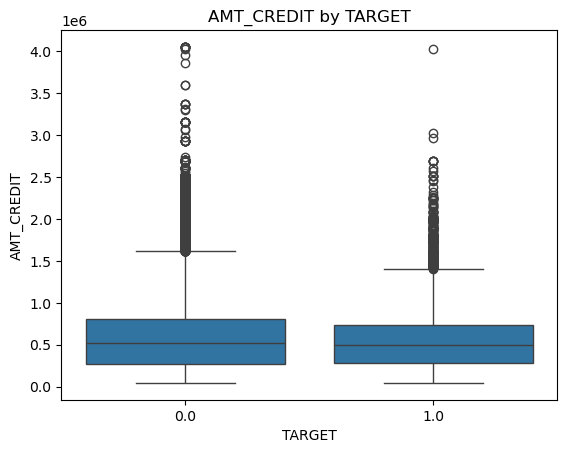

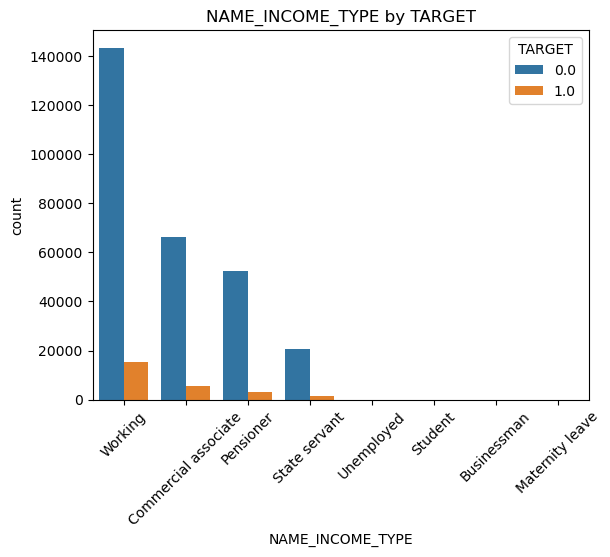

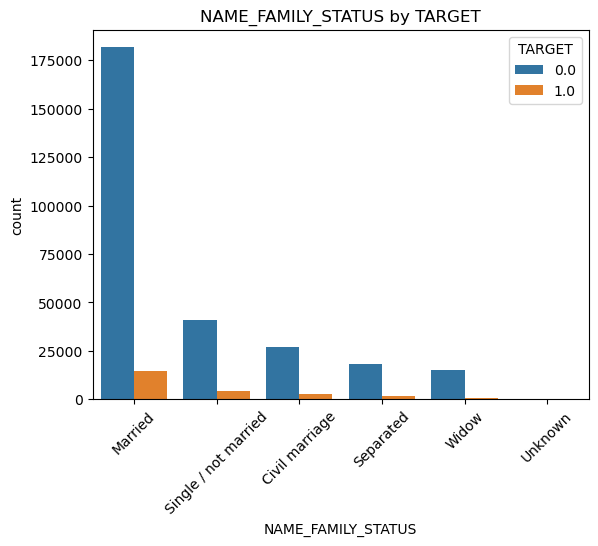

       CNT_CHILDREN                                                \
              count      mean       std  min  25%  50%  75%   max   
TARGET                                                              
0.0        282686.0  0.412946  0.718843  0.0  0.0  0.0  1.0  19.0   
1.0         24825.0  0.463807  0.756903  0.0  0.0  0.0  1.0  11.0   

       AMT_INCOME_TOTAL                 ...                        AMT_CREDIT  \
                  count           mean  ...       75%          max      count   
TARGET                                  ...                                     
0.0            282686.0  169077.722266  ...  202500.0   18000090.0   282686.0   
1.0             24825.0  165611.760906  ...  202500.0  117000000.0    24825.0   

                                                                             \
                 mean            std      min       25%       50%       75%   
TARGET                                                                        
0.0     602

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('application_train_cleaned.csv')

# Step 1: Explore Features
features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN', 
            'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE', 
            'NAME_FAMILY_STATUS']

# Visualize distributions
for feature in features:
    if data[feature].dtype == 'object':  # Categorical
        sns.countplot(data=data, x=feature, order=data[feature].value_counts().index)
        plt.title(f"Distribution of {feature}")
        plt.xticks(rotation=45)
        plt.show()
    else:  # Numerical
        sns.histplot(data[feature], kde=True)
        plt.title(f"Distribution of {feature}")
        plt.show()

# Step 2: Relate Features to TARGET
for feature in features:
    if data[feature].dtype == 'object':  # Categorical
        sns.countplot(data=data, x=feature, hue='TARGET', order=data[feature].value_counts().index)
        plt.title(f"{feature} by TARGET")
        plt.xticks(rotation=45)
        plt.show()
    else:  # Numerical
        sns.boxplot(data=data, x='TARGET', y=feature)
        plt.title(f"{feature} by TARGET")
        plt.show()

# Step 3: Summarize Insights
summary = data.groupby(['TARGET'])[features].describe()
print(summary)